In [1]:
# Import dependencies
%matplotlib inline
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pprint import pprint

In [2]:
# Clean data

df_rental_price = pd.read_csv('City_MedianRentalPrice_Sfr.csv')
df_rental_price.head()

df_aus_rent_price = df_rental_price.loc[
    (df_rental_price["RegionName"] == "Austin") & 
    (df_rental_price["State"] == "TX"), :]
df_aus_rent_price

,RegionName,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
11,Austin,TX,Austin-Round Rock,Travis County,12,NaN,NaN,NaN,NaN,NaN,...,1650.0,1660.0,1695.0,1700.0,1725.0,1750.0,1775.0,1750.0,1750.0,1700.0


In [3]:
df_aus_rent_price = df_aus_rent_price.drop(
    labels=['RegionName',
            'State',
            'Metro',
            'CountyName',
            'SizeRank'],
    axis='columns'
)

In [4]:
df_aus_rent_price = df_aus_rent_price.loc[:,'2016-03'::3]
df_aus_rent_price

,2016-03,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09
11,1495.0,1425.0,1375.0,1326.0,1630.0,1700.0,1695.0,1600.0,1695.0,1750.0,1750.0


In [5]:
df_aus_rent_price = df_aus_rent_price.transpose()
df_aus_rp_plot = df_aus_rent_price.reset_index()

df_aus_rp_plot.rename(
    index=str,
    columns={11:'Austin Median Rental Price',
             'index': 'Years'},
    inplace=True)


In [6]:
df_aus_rp_plot

,Years,Austin Median Rental Price
0,2016-03,1495.0
1,2016-06,1425.0
2,2016-09,1375.0
3,2016-12,1326.0
4,2017-03,1630.0
5,2017-06,1700.0
6,2017-09,1695.0
7,2017-12,1600.0
8,2018-03,1695.0
9,2018-06,1750.0


In [7]:
df_rental_price.head()

,RegionName,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
0,New York,NY,New York-Newark-Jersey City,Queens County,1,NaN,NaN,NaN,NaN,NaN,...,2595.0,2550.0,2500.0,2500.0,2600.0,2595.0,2600.0,2600.0,2605.0,2625.0
1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,NaN,NaN,NaN,NaN,...,3750.0,3650.0,3697.5,3850.0,3850.0,3980.0,3950.0,3950.0,4000.0,4000.0
2,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,NaN,NaN,1542.5,1500.0,1450.0,...,1500.0,1500.0,1512.5,1573.0,1576.0,1600.0,1600.0,1600.0,1600.0,1594.5
3,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,4,NaN,NaN,NaN,NaN,NaN,...,1500.0,1500.0,1545.0,1580.0,1600.0,1600.0,1600.0,1600.0,1595.0,1575.0
4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,NaN,NaN,NaN,NaN,NaN,...,1250.0,1250.0,1250.0,1275.0,1295.0,1300.0,1300.0,1300.0,1295.0,1275.0


In [8]:
df_natl_rent_price = df_rental_price.drop(
    labels=['RegionName', 
            'State', 
            'Metro', 
            'CountyName', 
            'SizeRank'], 
    axis='columns'
)
df_natl_rent_price.head()

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2595.0,2550.0,2500.0,2500.0,2600.0,2595.0,2600.0,2600.0,2605.0,2625.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3750.0,3650.0,3697.5,3850.0,3850.0,3980.0,3950.0,3950.0,4000.0,4000.0
2,NaN,NaN,1542.5,1500.0,1450.0,1575.0,1600.0,1500.0,1650.0,1700.0,...,1500.0,1500.0,1512.5,1573.0,1576.0,1600.0,1600.0,1600.0,1600.0,1594.5
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1500.0,1500.0,1545.0,1580.0,1600.0,1600.0,1600.0,1600.0,1595.0,1575.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1250.0,1250.0,1250.0,1275.0,1295.0,1300.0,1300.0,1300.0,1295.0,1275.0


In [9]:
df_natl_rent_price = df_natl_rent_price.loc[:, '2016-03'::3]
df_natl_rent_price.head()

,2016-03,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09
0,2700.0,2747.0,2800.0,2695.0,2617.5,2675.0,2675.0,2600.0,2500.0,2595.0,2605.0
1,3995.0,3900.0,3900.0,3600.0,3923.0,4000.0,3995.0,3900.0,3697.5,3980.0,4000.0
2,1561.0,1547.0,1551.5,1557.0,1500.0,1535.5,1550.0,1516.5,1512.5,1600.0,1600.0
3,1600.0,1500.0,1495.0,1400.0,1505.0,1595.0,1595.0,1500.0,1545.0,1600.0,1595.0
4,1100.0,1099.0,1074.0,1037.0,1200.0,1295.0,1250.0,1237.0,1250.0,1300.0,1295.0


In [10]:
df_natl_rp_avg = pd.DataFrame(df_natl_rent_price.mean())
df_natl_rp_avg

,0
2016-03,1696.192202
2016-06,1748.564085
2016-09,1716.171154
2016-12,1755.628977
2017-03,1938.856452
2017-06,2016.218654
2017-09,2041.483871
2017-12,2079.885086
2018-03,2088.302594
2018-06,2098.517651


In [11]:
df_natl_rp_plot = df_natl_rp_avg.reset_index()

df_natl_rp_plot.rename(
    index=str,
    columns={0:'National Median Rental Price',
             'index': 'Years'},
    inplace=True)

In [12]:
df_natl_rp_plot

,Years,National Median Rental Price
0,2016-03,1696.192202
1,2016-06,1748.564085
2,2016-09,1716.171154
3,2016-12,1755.628977
4,2017-03,1938.856452
5,2017-06,2016.218654
6,2017-09,2041.483871
7,2017-12,2079.885086
8,2018-03,2088.302594
9,2018-06,2098.517651


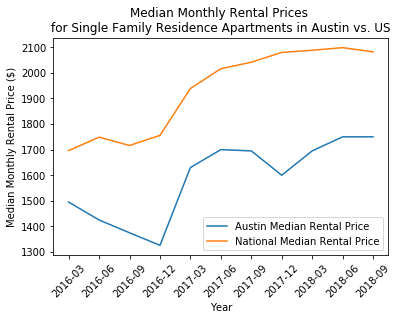

In [13]:
x_axis = np.arange(0, len(df_aus_rp_plot['Years']))
tick_loc = []
for x in x_axis:
    tick_loc.append(x)


plt.xticks(tick_loc, df_aus_rp_plot['Years'], rotation=45)    
    
plt.plot(x_axis, df_aus_rp_plot['Austin Median Rental Price'])
plt.plot(x_axis, df_natl_rp_plot['National Median Rental Price'])


plt.xlabel('Year')
plt.ylabel('Median Monthly Rental Price ($)')
plt.title('Median Monthly Rental Prices \n'
            'for Single Family Residence Apartments in Austin vs. US')


plt.legend(loc='best')
plt.show()

In [14]:
plt.savefig('Rental Plots/MedianMonthlyRentalPricesSFR_Aus_v_US.png')

<Figure size 432x288 with 0 Axes>

In [15]:
df_zri_rental_price = pd.read_csv('City_Zri_SingleFamilyResidenceRental.csv')
df_zri_rental_price.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2010-11,2010-12,2011-01,2011-02,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
0,6181,New York,NY,New York-Newark-Jersey City,Queens County,1,1751.0,1760.0,1773.0,1784.0,...,2301,2292,2283,2272,2262,2255,2251,2249,2248,2255
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,2310.0,2313.0,2307.0,2307.0,...,3012,3015,3020,3024,3026,3026,3023,3019,3016,3025
2,17426,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,1500.0,1500.0,1489.0,1472.0,...,1593,1587,1579,1574,1568,1563,1560,1559,1559,1564
3,39051,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,4,1260.0,1245.0,1235.0,1229.0,...,1472,1468,1466,1465,1463,1461,1459,1457,1454,1457
4,6915,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,1074.0,1054.0,1041.0,1031.0,...,1288,1286,1285,1285,1285,1285,1285,1286,1285,1288


In [16]:
df_aus_zri_rp = df_zri_rental_price.loc[
    (df_zri_rental_price["RegionName"] == "Austin") & 
    (df_zri_rental_price["State"] == "TX"), :]
df_aus_zri_rp

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2010-11,2010-12,2011-01,2011-02,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
11,10221,Austin,TX,Austin-Round Rock,Travis County,12,1352.0,1356.0,1361.0,1370.0,...,1839,1831,1830,1832,1832,1831,1831,1832,1833,1836


In [17]:
df_aus_zri_rp = df_aus_zri_rp.loc[:,'2016-03'::3]
df_aus_zri_rp

,2016-03,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09
11,1856,1909,1932,1887,1862,1886,1906,1857,1830,1831,1833


In [18]:
df_aus_zri_rp = df_aus_zri_rp.transpose()
df_aus_zri_rp_plot = df_aus_zri_rp.reset_index()

df_aus_zri_rp_plot.rename(
    index=str,
    columns={11:'Austin Zillow Rental Index',
             'index': 'Years'},
    inplace=True)

df_aus_zri_rp_plot

,Years,Austin Zillow Rental Index
0,2016-03,1856
1,2016-06,1909
2,2016-09,1932
3,2016-12,1887
4,2017-03,1862
5,2017-06,1886
6,2017-09,1906
7,2017-12,1857
8,2018-03,1830
9,2018-06,1831


In [19]:
df_zri_rental_price.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2010-11,2010-12,2011-01,2011-02,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
0,6181,New York,NY,New York-Newark-Jersey City,Queens County,1,1751.0,1760.0,1773.0,1784.0,...,2301,2292,2283,2272,2262,2255,2251,2249,2248,2255
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,2310.0,2313.0,2307.0,2307.0,...,3012,3015,3020,3024,3026,3026,3023,3019,3016,3025
2,17426,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,1500.0,1500.0,1489.0,1472.0,...,1593,1587,1579,1574,1568,1563,1560,1559,1559,1564
3,39051,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,4,1260.0,1245.0,1235.0,1229.0,...,1472,1468,1466,1465,1463,1461,1459,1457,1454,1457
4,6915,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,1074.0,1054.0,1041.0,1031.0,...,1288,1286,1285,1285,1285,1285,1285,1286,1285,1288


In [20]:
df_natl_zri_rp = df_zri_rental_price.loc[:,'2016-03'::3]
df_natl_zri_rp.head()

,2016-03,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09
0,2224,2235,2293,2311,2298,2289,2343,2315,2283,2255,2248
1,2773,2831,2889,2920,2928,2956,2996,3009,3020,3026,3016
2,1547,1549,1584,1573,1543,1576,1614,1602,1579,1563,1559
3,1469,1477,1479,1462,1445,1444,1465,1473,1466,1461,1454
4,1238,1246,1250,1249,1249,1260,1290,1290,1285,1285,1285


In [21]:
df_natl_zri_rp_avg = pd.DataFrame(df_natl_zri_rp.mean())
df_natl_zri_rp_avg

,0
2016-03,1481.295562
2016-06,1501.716266
2016-09,1513.050478
2016-12,1500.742183
2017-03,1489.904468
2017-06,1506.801326
2017-09,1534.934001
2017-12,1525.251262
2018-03,1514.958939
2018-06,1515.978980


In [22]:
df_natl_zri_rp_plot = df_natl_zri_rp_avg.reset_index()

df_natl_zri_rp_plot.rename(
    index=str,
    columns={0:'National Zillow Rental Index',
             'index': 'Years'},
    inplace=True)
df_natl_zri_rp_plot

,Years,National Zillow Rental Index
0,2016-03,1481.295562
1,2016-06,1501.716266
2,2016-09,1513.050478
3,2016-12,1500.742183
4,2017-03,1489.904468
5,2017-06,1506.801326
6,2017-09,1534.934001
7,2017-12,1525.251262
8,2018-03,1514.958939
9,2018-06,1515.978980


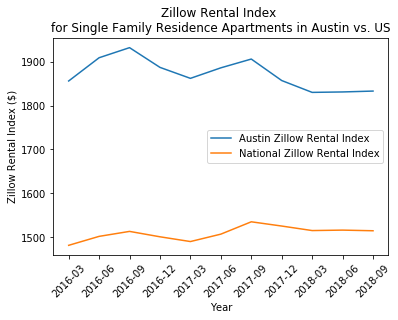

In [23]:
x_axis = np.arange(0, len(df_aus_zri_rp_plot['Years']))
tick_loc = []
for x in x_axis:
    tick_loc.append(x)


plt.xticks(tick_loc, df_aus_zri_rp_plot['Years'], rotation=45)    
    
plt.plot(x_axis, df_aus_zri_rp_plot['Austin Zillow Rental Index'])
plt.plot(x_axis, df_natl_zri_rp_plot['National Zillow Rental Index'])


plt.xlabel('Year')
plt.ylabel('Zillow Rental Index ($)')
plt.title('Zillow Rental Index \n'
            'for Single Family Residence Apartments in Austin vs. US')


plt.legend(loc='best')
plt.show()

In [24]:
plt.savefig('Rental Plots/ZRI_SFR_Aus_v_US.png')

<Figure size 432x288 with 0 Axes>

In [25]:
df_p_to_r_ratio = pd.read_csv('City_PriceToRentRatio_AllHomes.csv')
df_p_to_r_ratio.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2010-10,2010-11,2010-12,2011-01,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
0,6181,New York,NY,New York-Newark-Jersey City,Queens County,1,18.72,18.72,18.60,18.71,...,24.03,24.01,23.95,23.97,24.12,24.10,24.13,23.99,23.77,23.73
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,15.15,15.06,15.01,14.93,...,18.25,18.29,18.48,18.60,18.72,18.80,18.80,18.90,18.79,18.81
2,17426,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,10.69,10.54,10.48,10.46,...,11.33,11.38,11.51,11.65,11.87,12.00,12.01,11.89,11.69,11.63
3,39051,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,4,8.30,8.30,8.22,8.38,...,9.79,9.81,9.89,9.94,10.08,10.14,10.17,10.05,9.94,9.91
4,6915,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,9.80,9.92,9.86,9.80,...,10.08,10.17,10.27,10.33,10.43,10.53,10.64,10.85,11.04,11.05
